In [1]:
import numpy as np
from scipy.optimize import minimize

def cauchy_total_log_likelihood(X, m, s):
    X = np.array(X)
    
    L = 0
    L += -len(X)/2 * np.log(s**2)
    L += -np.sum( np.log(1 + (X - m)**2 / s**2 ) )
    
    return L

X = [-10, 1, 2, 5, 20]
def func_to_minimize(theta):
    m = theta[0]
    s = theta[1]
    return  - cauchy_total_log_likelihood(X, m, s)

m0 = 0
s0 = 10
result = minimize(func_to_minimize, [m0, s0])
m_MLE, s_MLE = result.x
m_MLE, s_MLE

(2.2507683169888373, 3.089772058568388)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import cauchy

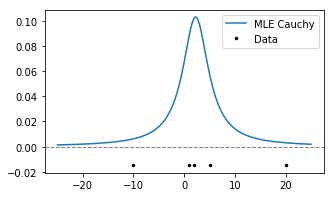

In [5]:
plt.figure(figsize=(5, 3))

x = np.linspace(-25, 25, 200)
plt.plot(x, cauchy.pdf(x, loc=m_MLE, scale=s_MLE), label='MLE Cauchy')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
ax = plt.gca()
ylim = ax.get_ylim()
lower_track = ylim[0] - (ylim[1] - ylim[0]) * 0.1
plt.plot(X, [lower_track]*len(X), 'k.', ms=5, label='Data')
plt.legend(loc=0)

plt.savefig('/Users/peterkomar/InsightWorkshop/Bayesian-methods-course/' + 
            'figs/Cauchy_MLE.pdf', bbox_inches='tight')
plt.show()

In [7]:
from scipy.stats import binom, beta

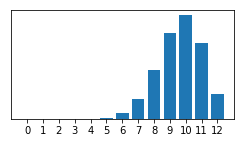

In [8]:
n = 12
k = range(0, n+1, 1)
plt.figure(figsize=(4,2))
plt.bar(k, binom.pmf(k, n, 0.8))
plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.gca().set_xticks(k)
plt.gca().set_xticklabels(k)
plt.savefig('./binom.pdf', bbox_inches='tight')
plt.show()

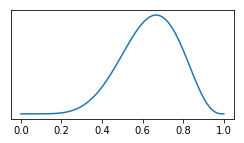

In [9]:
x = np.linspace(0, 1, 100)
plt.figure(figsize=(4,2))
plt.plot(x, beta.pdf(x, a=7, b=4))
plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./beta.pdf', bbox_inches='tight')
plt.show()

In [10]:
from scipy.stats import multinomial, dirichlet

In [58]:
n = 12
k1_raw = np.array(range(0, n+1, 1))
k2_raw = np.array(range(n, -1, -1))
k1, k2 = np.meshgrid(k1_raw, k2_raw)
k3 = (n - k1 - k2)

p = [0.5, 0.2, 0.3]

pmf = np.zeros_like(k1).astype(float)
for i in range(pmf.shape[0]):
    for j in range(pmf.shape[1]):
        x = [k1[i,j], k2[i,j], k3[i,j]]
        pmf[i,j] = multinomial.pmf(x, n, p)

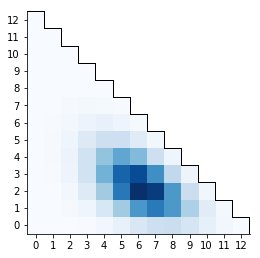

In [150]:
cmap = plt.cm.get_cmap("Blues")
cmap.set_bad(color='#FFFFFF', alpha=None)
plt.matshow(np.ma.masked_where(k3 < 0, pmf), cmap=cmap)

ax = plt.gca()
ax.set_xticks(k1_raw)
ax.set_xticklabels(k1_raw)
ax.xaxis.set_ticks_position('bottom')
ax.set_yticks(k1_raw)
ax.set_yticklabels(k2_raw)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i in range(0, n+1, 1):
    plt.plot([i-0.5, i+0.5], [i-0.5, i-0.5], 'k-', lw=1)
    plt.plot([i+0.5, i+0.5], [i-0.5, i+0.5], 'k-', lw=1)
plt.xlim(-0.5, 12.54)
plt.ylim(12.5, -0.54)
plt.savefig('./Multinomial.pdf', bbox_inches='tight')
plt.show()

In [99]:
alpha = [5, 2, 5]

x1_raw = np.linspace(0, 1, 100)
x2_raw = np.linspace(0, 1, 100)

x1, x2 = np.meshgrid(x1_raw, x2_raw)
x3 = 1 - x1 - x2

pdf = np.zeros_like(x1)
for i in range(pdf.shape[0]):
    for j in range(pdf.shape[1]):
        x = np.array([x1[i,j], x2[i,j], x3[i,j]])
        if np.any(x <= 0):
            pdf[i,j] = 0
        else:
            pdf[i,j] = dirichlet.pdf(x, alpha)

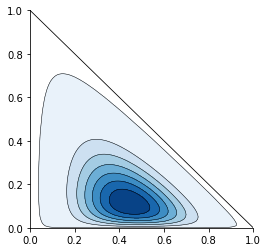

In [145]:
plt.figure(figsize=(4,4))
levels = np.linspace(0.01, np.max(pdf), 8)
plt.contour(x1, x2, pdf, levels, colors='k', linewidths=(0.5,))
plt.contourf(x1, x2, pdf, levels, cmap='Blues')
plt.plot([0,1], [1,0], 'k-', lw=0.8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('./Dirichlet.pdf', bbox_inches='tight')
plt.show()

In [151]:
from scipy.stats import poisson, gamma

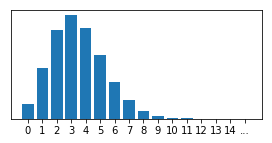

In [172]:
lamb = 3.5
k = range(0, 16, 1)
plt.figure(figsize=(4.5,2))
plt.bar(k, poisson.pmf(k, lamb))
plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.gca().set_xticks(k)
plt.gca().set_xticklabels(list(k)[:-1] + ['...'])
plt.savefig('./Poisson.pdf', bbox_inches='tight')
plt.show()

In [173]:
gamma?

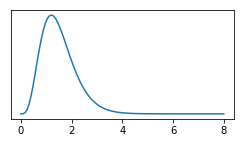

In [193]:
x = np.linspace(0, 8, 100)
a = 5
scale = 0.3
plt.figure(figsize=(4,2))
plt.plot(x, gamma.pdf(x, a=a, scale=scale))

plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./Gamma.pdf', bbox_inches='tight')
plt.show()

In [187]:
from scipy.stats import expon

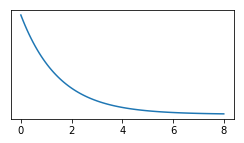

In [197]:
x = np.linspace(0, 8, 100)
scale = 1.5
plt.figure(figsize=(4,2))
plt.plot(x, expon.pdf(x, scale=scale))

plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./Exp.pdf', bbox_inches='tight')
plt.show()

In [198]:
from scipy.stats import norm

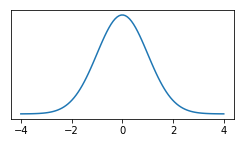

In [199]:
x = np.linspace(-4, 4, 100)
scale = 1
plt.figure(figsize=(4,2))
plt.plot(x, norm.pdf(x, scale=scale))

plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./Norm.pdf', bbox_inches='tight')
plt.show()

In [204]:
from scipy.stats import invgamma

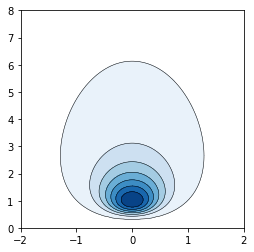

In [223]:
mu_raw = np.linspace(-2, 2, 100)
sigma2_raw = np.linspace(0.01, 8, 100)

mu, sigma2 = np.meshgrid(mu_raw, sigma2_raw)

n = 8
alpha = (n - 3) / 2
beta = n * 1 / 2
mu_c = 0
lamb = n

pdf = np.zeros_like(mu)
for i in range(pdf.shape[0]):
    for j in range(pdf.shape[1]):
        m = mu[i,j]
        s2 = sigma2[i,j]
        pdf[i,j] = invgamma.pdf(s2, a=alpha, scale=beta) * \
                   norm.pdf(m, loc=mu_c, scale=np.sqrt(s2 / lamb))


plt.figure(figsize=(4,4))
levels = np.linspace(0.01, np.max(pdf), 8)
plt.contour(mu, sigma2, pdf, levels, colors='k', linewidths=(0.5,))
plt.contourf(mu, sigma2, pdf, levels, cmap='Blues')

ax = plt.gca()

plt.savefig('./Norm-Inverse-Gamma.pdf', bbox_inches='tight')
plt.show()

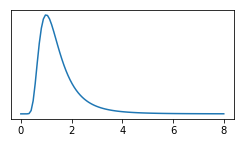

In [226]:
x = np.linspace(0, 8, 100)
a = 5
scale = 6
plt.figure(figsize=(4,2))
plt.plot(x, invgamma.pdf(x, a=a, scale=scale))

plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./Inv-Gamma.pdf', bbox_inches='tight')
plt.show()

In [227]:
from scipy.stats import t

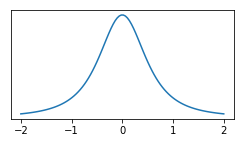

In [234]:
x = np.linspace(-2, 2, 100)
scale = 0.5
plt.figure(figsize=(4,2))
plt.plot(x, t.pdf(x, scale=scale, df=2))

plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.savefig('./t-dist.pdf', bbox_inches='tight')
plt.show()